In [36]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Word Cloud
from wordcloud import WordCloud
# from textacy import preprocessing
from nltk.stem.snowball import SnowballStemmer
from keras.preprocessing import sequence
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
# import these modules
from nltk.stem import WordNetLemmatizer
import re

# Load Data
Target set:
* 0: Sadness
* 1: Joy
* 2: Love
* 3: Anger
* 4: Suprise

In [25]:
# Load Data 
df = pd.read_csv("D:\\project\\AWS\\Emotions_analysis_NLP\\data\\raw\\text.csv")
df.head()

,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax a...,0
2,2,i gave up my internship with the dmrg and am f...,4
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughl...,4


In [10]:
# Shape Of Data 
print(f'The Shape Of Data Is : {df.shape}')

The Shape Of Data Is : (416809, 3)


In [11]:
# Null Values 
df.isnull().sum()

Unnamed: 0    0
text          0
label         0
dtype: int64

In [12]:
# Duplicates
df.duplicated().sum()

0

In [14]:
# drop index
df.drop('Unnamed: 0',axis=1, inplace=True)

In [15]:
df.head()

,text,label
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax a...,0
2,i gave up my internship with the dmrg and am f...,4
3,i dont know i feel so lost,0
4,i am a kindergarten teacher and i am thoroughl...,4


# Label count

C:\Users\kunal\AppData\Local\Temp\ipykernel_11200\3175363569.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=count.index, y=count.values, ax=axs[1], palette="viridis")


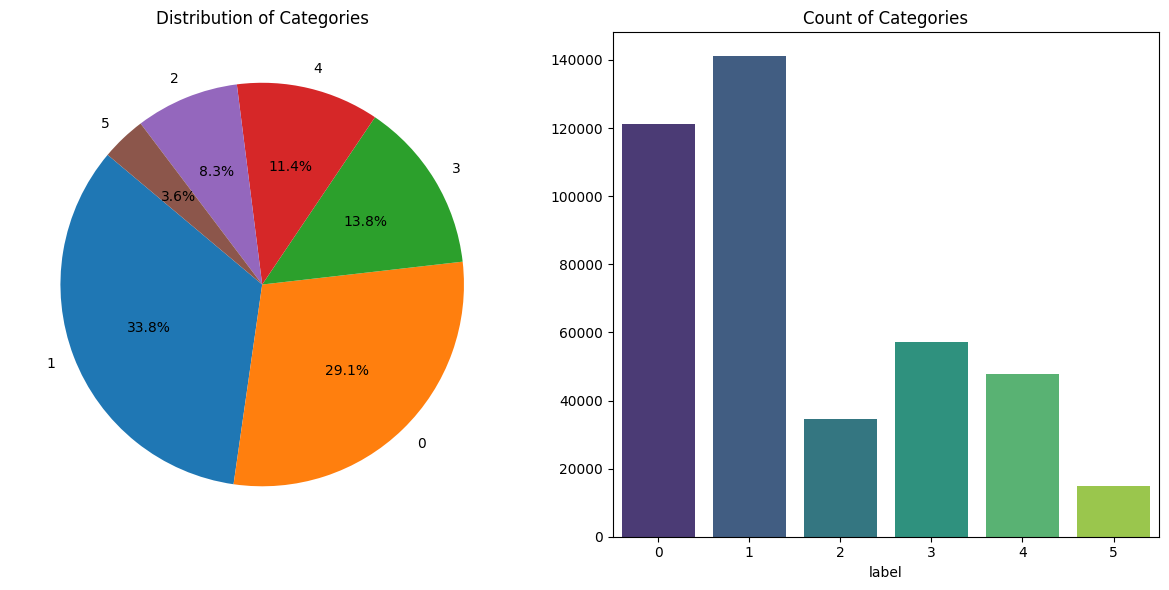

In [16]:
# Value Count Of Label
count = df['label'].value_counts()

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6), facecolor='white')

# Plot pie chart on the first subplot
palette = sns.color_palette("viridis")
sns.set_palette(palette)
axs[0].pie(count, labels=count.index, autopct='%1.1f%%', startangle=140)
axs[0].set_title('Distribution of Categories')

# Plot bar chart on the second subplot
sns.barplot(x=count.index, y=count.values, ax=axs[1], palette="viridis")
axs[1].set_title('Count of Categories')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# Text Processing
1. Remove URLs: Uses a rgualar expression to remove URLs from the text data.
1. Remove Special chararcters and punctuation: Uses a regular expression to remove any special characters and punctuation marks from the text.
1. Remove extra whitespace: Uses regular expression to remove extra whitesapce and replace them with a single space.
1. Remove numeric values: Uses  regular expression to remove any numeric values from the text.
1. Lowercasing: Converts all text to lowercase to ensure consistency.
1. Remove stop words: Removes common English stop words, such as "the", "is", "and", etc. using NLTK stopwords list.
1. Remove non-alphanumeric characters from the text: Uses regular expression to remove any non-alphanumeric characters from the text.
1. Lemmatization
1. stemming

This will help us to clean and  normalize the text data.

In [17]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [37]:
# Download nltk resources
nltk.download('punkt')
nltk.download('stopwords') 
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kunal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kunal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kunal\AppData\Roaming\nltk_data...


True

## Step I: Remove URL's

In [26]:
df["text"] = df["text"].str.replace(r'https\S+', '', regex=True)
# Display first few rows
print(df.head())

   Unnamed: 0                                               text  label
0           0      i just feel really helpless and heavy hearted      4
1           1  ive enjoyed being able to slouch about relax a...      0
2           2  i gave up my internship with the dmrg and am f...      4
3           3                         i dont know i feel so lost      0
4           4  i am a kindergarten teacher and i am thoroughl...      4


## Step II: Remove special character and punctuation

In [27]:
df["text"]= df['text'].str.replace(r'[^\w\s]','', regex=True)
print(df.head())

   Unnamed: 0                                               text  label
0           0      i just feel really helpless and heavy hearted      4
1           1  ive enjoyed being able to slouch about relax a...      0
2           2  i gave up my internship with the dmrg and am f...      4
3           3                         i dont know i feel so lost      0
4           4  i am a kindergarten teacher and i am thoroughl...      4


## Step III: Remove extra whitespace


In [28]:
df["text"]= df["text"].str.replace(r'\s+',' ',regex=True )
print(df.head())

   Unnamed: 0                                               text  label
0           0      i just feel really helpless and heavy hearted      4
1           1  ive enjoyed being able to slouch about relax a...      0
2           2  i gave up my internship with the dmrg and am f...      4
3           3                         i dont know i feel so lost      0
4           4  i am a kindergarten teacher and i am thoroughl...      4


## Step IV: Remove Numeric values in text

In [29]:
df['text'] = df['text'].str.replace(r'\d+', '', regex=True)
print(df.head())

   Unnamed: 0                                               text  label
0           0      i just feel really helpless and heavy hearted      4
1           1  ive enjoyed being able to slouch about relax a...      0
2           2  i gave up my internship with the dmrg and am f...      4
3           3                         i dont know i feel so lost      0
4           4  i am a kindergarten teacher and i am thoroughl...      4


## Step V: Lower the text cases 

In [30]:
df['text']= df['text'].str.lower()
df.head()

,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax a...,0
2,2,i gave up my internship with the dmrg and am f...,4
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughl...,4


## Step VI: Remove stopwords

In [32]:
stop = stopwords.words('english')
df['text'] = df['text'].apply(lambda x: ' '.join([word for  word in x.split() if word not in (stop)]))

df.head()

,Unnamed: 0,text,label
0,0,feel really helpless heavy hearted,4
1,1,ive enjoyed able slouch relax unwind frankly n...,0
2,2,gave internship dmrg feeling distraught,4
3,3,dont know feel lost,0
4,4,kindergarten teacher thoroughly weary job take...,4


## Step VII: Remove Non-alpha mumeric 

In [34]:
df['text']= df["text"].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))

df.head()

,Unnamed: 0,text,label
0,0,feel really helpless heavy hearted,4
1,1,ive enjoyed able slouch relax unwind frankly n...,0
2,2,gave internship dmrg feeling distraught,4
3,3,dont know feel lost,0
4,4,kindergarten teacher thoroughly weary job take...,4


## Step VIII: Lemmatization

In [39]:
# Define a function to lemmatize a single word
def lemmatize_text(text):
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])

In [40]:
# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Apply the lemmatization function to the 'text' column
df['text'] = df['text'].apply(lambda x: lemmatize_text(x))

# Train and test split

In [41]:
X = df['text']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,
                                                    random_state=3)
# print the shapes fo the training anf test data
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (333447,)
X_test shape: (83362,)
y_train shape: (333447,)
y_test shape: (83362,)


# Tokenization and pedding sequence

1. Tokenization: The text data in X_train and X_test is tokenized using the Tokenizer class from Keras. This step converts the text data into sequences of integers, where each unique word in the dataset is assigned a unique integer index. The num_words parameter limits the vocabulary size to 50,000 most frequent words.¶
1. Padding: After tokenization, the sequences in X_train and X_test are padded to ensure uniform length. This is achieved using the pad_sequences function, which pads sequences with zeros to make them all of the same length (maxlen). Padding is done after the sequences to ensure that the actual content of the text is preserved.

In [43]:
# Tokenise the  text data
tokenizer = Tokenizer(num_words=50000)
tokenizer.fit_on_texts(X_train)
tokenizer.fit_on_texts(X_test)
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

In [44]:
# Max Len in X_train_sequences
maxlen = max(len(tokens) for tokens in X_train_sequences)
print("Maximum sequence length (maxlen):", maxlen)

Maximum sequence length (maxlen): 79


In [45]:
# Perform padding on X_train and X_test sequences
X_train_padded = pad_sequences(X_train_sequences, maxlen=maxlen, padding='post',)
X_test_padded = pad_sequences(X_test_sequences, maxlen=maxlen, padding='post')

# Print the padded sequences for X_train and X_test
print("X_train_padded:")
print(X_train_padded)
print("\nX_test_padded:")
print(X_test_padded)

X_train_padded:
[[   46     1   421 ...     0     0     0]
 [   20   230  7737 ...     0     0     0]
 [    1   563    17 ...     0     0     0]
 ...
 [  193    77 35362 ...     0     0     0]
 [    1  1587     4 ...     0     0     0]
 [ 3697   167    56 ...     0     0     0]]

X_test_padded:
[[816  27  14 ...   0   0   0]
 [  1  36  70 ...   0   0   0]
 [194  33   1 ...   0   0   0]
 ...
 [  5   3  23 ...   0   0   0]
 [151   2 184 ...   0   0   0]
 [  1   5 143 ...   0   0   0]]
